In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from astropy.io import fits

$$\text{Crossed radius selection}$$

$$\text{Shift and go to Topcat}$$

In [3]:
Path = './CentralDogma/2_Lust_/'

# filename = [
#     '3-2MASSv2.csv', '3-NOMADv2.csv', '3-PS1v2.csv', '3-ALLWISEv2.csv',
#     '3-WISEv2.csv', '3-SIMBADv2.csv',
#     '3-CatWISEv2.csv', '3-unWISEv2.csv',
#     '3-SDSS16v2.csv', 
#     '3-IRAS_psc_allsky.csv', '3-IRAS_fsc_allsky.csv'
# ]
filename = [
    '2-2MASSv2.csv', '2-NOMADv2.csv', '2-PS1v2.csv', '2-ALLWISEv2.csv',
    '2-WISEv2.csv', '2-SIMBADv2.csv',
    '2-CatWISEv2.csv', '2-unWISEv2.csv',
    '2-SDSS16v2.csv', 
    '2-IRAS_pscv2.csv', '2-IRAS_fscv2.csv'
]

cname = [
    ['RAJ2000','DEJ2000'],['RAJ2000','DEJ2000'],['RAJ2000','DEJ2000'],['RAJ2000','DEJ2000'],
    ['ra_2a','dec_2a'], ['ra_2a','dec_2a'], 
    ['RAdeg', 'DEdeg'], ['RAdeg', 'DEdeg'], 
    ['RA_ICRS','DE_ICRS'], 
    ['ra_2','dec_2'], ['ra_2','dec_2']
]

radius = [
    [5.872, 7.429], [12.354, 12.812], [9.257, 9.388], [9.793, 10.032],
    [11.216, 11.561], [4.451, 5.515],
    [7.244, 7.195], [7.151, 7.184],
    [7.162, 7.174],
    [7.390, 5.163], [11.367, 6.594]
]

bias = [
    [0.6890,-0.5711],[0.2555,-0.4098],[0.1348,-0.056],[0.2153,-0.0679],
    [0.3079,-0.1642],[0.8619,-0.532],
    [0.0943,-0.0667],[0.1289,-0.0526],
    [0.0706,-0.046],
    [1.0773,0.7455],[1.0551, 0.0243]
]

for i in range(11):
    
    data = pd.read_csv(Path+filename[i])
    
    num = len(data.RA)
    
    era = np.ones(num)*radius[i][0]
    edec = np.ones(num)*radius[i][1]
    ang = np.zeros(num)
    
    data = data.assign(RAerr=era, DECerr=edec, ang=ang)
    
    data[cname[i][0]] += bias[i][0]/3600
    data[cname[i][1]] += bias[i][1]/3600
    
    data.to_csv('./CentralDogma/7_Violence_/'+filename[i].split('.')[0]+'_shift.csv')


In [28]:
Path = './CentralDogma/2_Lust_/'

filename = [
    '3-2MASSv2.csv', '3-NOMADv2.csv', '3-PS1v2.csv', '3-ALLWISEv2.csv',
    '3-WISEv2.csv', '3-SIMBADv2.csv',
    '3-CatWISEv2.csv', '3-unWISEv2.csv',
    '3-SDSS16v2.csv', 
    '3-IRASv2.csv'
]

radius = [
    5.872, 12.354, 9.257, 9.793,
    11.216, 4.451,
    7.195, 7.151,
    7.162,
    7.436
]

bias = [
    [0.6890,-0.5711],[0.2555,-0.4098],[0.1348,-0.056],[0.2153,-0.0679],
    [0.3079,-0.1642],[0.8619,-0.532],
    [0.0943,-0.0667],[0.1289,-0.0526],
    [0.0706,-0.046],[0.4237,-1.359]
]

d0 = pd.DataFrame()

for i in range(10):
    
    data = pd.read_csv(Path+filename[i])
    
    di = pd.DataFrame(
        data = {'RA': data.RA.loc[data.angDist<2*radius[i]],
                'DEC': data.DEC.loc[data.angDist<2*radius[i]]}
        )
    
    d0 = pd.concat([di, d0], ignore_index=True)

d0

,RA,DEC
0,30.112674,-8.524387
1,30.170829,-11.692712
2,30.245431,8.311557
3,30.335136,-2.373765
4,30.549036,-0.127537
...,...,...
254169,49.996811,15.825194
254170,49.997408,19.095591
254171,49.997723,2.232566
254172,49.998327,11.756894


In [29]:
d0.to_csv('./CentralDogma/2_Lust_/3-allCircular.csv')

In [5]:
ra = []

data = pd.read_csv('./CentralDogma/2_Lust_/3-2MASSv2.csv')

ra.append(data.RA.loc[data.angDist<10])


[35       30.016740
 58       30.030659
 66       30.032367
 70       30.033582
 71       30.033660
            ...    
 49218    49.996811
 49220    49.997408
 49222    49.997723
 49225    49.998327
 49231    49.999749
 Name: RA, Length: 4845, dtype: float64]

$$\text{Cirrus cutout plot}$$

In [3]:
list2flux = pd.read_csv('./CentralDogma/1_Limbo_/list3flux.csv')

def plot(fc, save=False):
    
    data = list2flux.loc[
        list2flux.BG90>fc, 
        ['RA', 'DEC']
    ]
    
    ra = data.RA
    dec = data.DEC 
    
    if save == True:
        
        data.to_csv(f'./CentralDogma/4_Greed_/list3flux{fc}.csv')
    
    fig, ax = plt.subplots(figsize=(14,7))
    
    plt.scatter(
        ra, dec, 
        s = 2, 
        marker = 'o',
        alpha = 0.5
    )
    
    plt.xlabel('ra')
    plt.ylabel('dec')
    plt.xlim([0, 360])
    plt.ylim([-90, 90])
    
    plt.show()

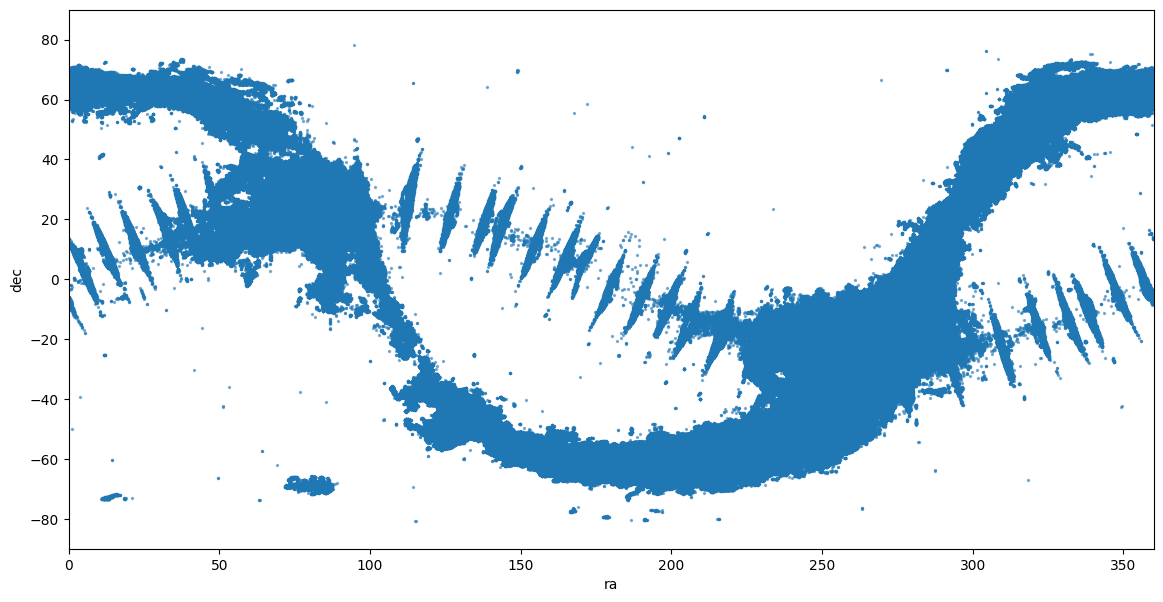

In [10]:
plot(0.3)

$$Flux$$

In [5]:
listv4 = pd.read_csv('./CentralDogma/8_Fraud_/list2v4.csv')

flux90 = listv4.FLUX90
bg90 = listv4.BG90

mask = (bg90<0.3) & (flux90>=bg90*3) & (listv4.NSCANC90>=2)
selected = listv4.loc[mask]
selected.to_csv('./CentralDogma/9_Treachery_/list2v5.csv')

In [10]:
list5 = pd.read_csv('./CentralDogma/9_Treachery_/list3v5.csv')

In [11]:
mask = (list5.NSCANC90 != list5.NSCANP90) | (list5.MCONF90 != 1)
list5.loc[mask].to_csv('./CentralDogma/9_Treachery_/list3v6.csv')

In [7]:
list6 = pd.read_csv('./CentralDogma/9_Treachery_/list3v6.csv')

In [8]:
list6[['OBJID','RA','DEC', 'FLUX90', 'BG90']].sort_values('FLUX90')[-10:]
# list6[['FLUX65','FLUX90','FLUX140','FLUX160',]].sort_values('FLUX90')[:10]

,OBJID,RA,DEC,FLUX90,BG90
363,5619658,47.519990,-16.517694,3.331097,0.133793
118,5454338,36.113314,-17.417109,3.424374,0.087872
292,5564736,43.904950,-12.988342,3.570285,0.113972
154,5480695,37.966766,-9.382093,3.582802,0.162994
285,5561131,43.660183,-16.346856,4.321516,0.141960
145,5474777,37.548877,-5.652221,5.160554,0.155142
36,5401237,32.294578,5.256336,5.661844,0.229950
143,5474476,37.526990,-15.738040,6.439498,0.143823
367,5623120,47.734241,-11.296901,6.571809,0.176982
136,5468968,37.140931,-15.202940,9.572477,0.105401


In [13]:
top10 = list6.sort_values('FLUX90')[:10]
top10.to_csv('./CentralDogma/9_Treachery_/top10.csv')

In [10]:
list6['SNR'] = list6['FLUX90'] / list6['BG90']  # Calculate the signal-to-noise ratio

# Select the columns with top 10 SNR
list6[['OBJID', 'RA', 'DEC', 'FLUX90', 'BG90', 'SNR']].sort_values('SNR')[-20:]

,OBJID,RA,DEC,FLUX90,BG90,SNR
14,5386650,31.207829,-14.588197,2.699723,0.150122,17.983516
230,5530771,41.542503,-15.861242,2.650923,0.142109,18.654191
346,5609558,46.875215,-10.810901,3.174242,0.160736,19.748132
89,5427865,34.214627,-15.346439,3.017005,0.147513,20.452415
94,5431727,34.491641,-13.192990,2.567558,0.120419,21.321893
353,5612834,47.088185,-15.257578,3.316707,0.154626,21.449824
313,5580524,44.947000,-18.691356,2.766162,0.128945,21.452237
154,5480695,37.966766,-9.382093,3.582802,0.162994,21.981215
359,5616092,47.297102,-15.764776,3.175092,0.139918,22.692575
323,5590283,45.611811,-16.489164,2.692581,0.115328,23.347103


In [23]:
n = 0.14
x=list6.loc[(list6.BG90>n)&(list6.BG90<n+0.01)]
x[['OBJID','RA','DEC', 'FLUX90', 'BG90']]

,OBJID,RA,DEC,FLUX90,BG90
1,5372954,30.188770,-12.109138,0.982874,0.146173
5,5375270,30.360409,-15.060910,1.265316,0.142697
9,5377715,30.543464,-12.337805,0.531264,0.145229
11,5378261,30.582043,-16.630572,0.451066,0.147421
16,5387250,31.252776,-14.215345,0.435488,0.143523
...,...,...,...,...,...
379,5631691,48.294392,-15.798809,0.502571,0.140267
397,5648684,49.397696,-6.842538,0.907834,0.148202
403,5651578,49.583847,-13.775461,0.501436,0.148259
408,5654178,49.743995,-7.917353,0.482086,0.149020


$$ \text{Test}
$$

$$
\frac{4}{3}\pi R^3 \rho = M \\
\Omega = \frac{A}{r^2}sr\\
A = \pi R^2\\
Flux90 = 7*10^{-5}*\Omega [W/m^2/\mu m], T=30K\\
Flux90 = 8.3*10^{-4}*\Omega [W/m^2/\mu m], T=55K\\
Jy = Flux90*10^{26}*\frac{\lambda^2}{c}
$$

In [2]:
def flux(M, D, T):
    
    '''
    M: mass in earth mass
    m: mass in gram
    D: distance in AU
    r: distance in cm
    rho: density in g/cm3
    F: flux in jansky
    '''
    rho = 1.454
    m = M*6*10**(27)
    r = D*1.5*10**(13)
    
    if T==55:
        Teff = 8.3*10**(-4)
    if T==50:
        Teff = 0.00061
    if T==30:
        Teff = 7*10**(-5)
    
    # Teff = 2*10**(-7)
    
    R = (3*m/(4*3.14*rho))**(1/3)
    
    A = 3.14*R*R
    # A = 7.62*10**(19)
    
    F = 10**(26)*90*9*10**(-5)/(3*10**(8))*Teff*A/(r*r)
    # F = 10**(26)*1000*100*10**(-5)/(3*10**(8))*Teff*A/(r*r)
    
    return F 

In [2]:
flux(5, 700, 30)

0.01558853000042239

In [3]:
candi = pd.read_csv('./CentralDogma/9_Treachery_/list3v6.csv')

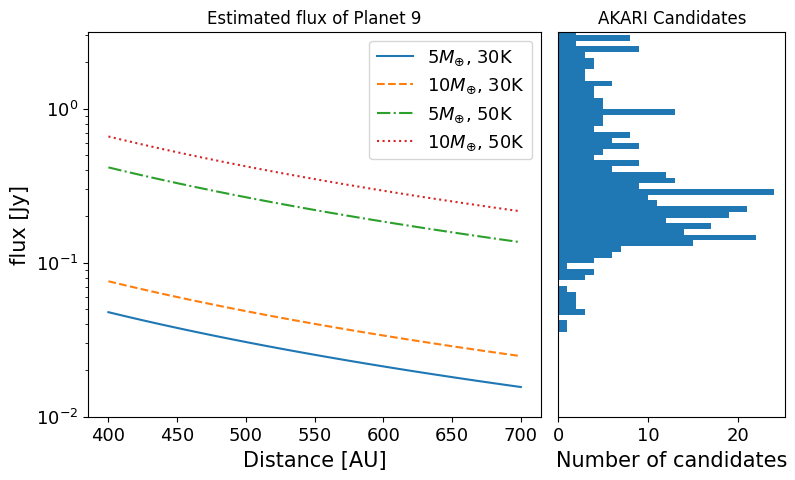

In [4]:
fig , ax=plt.subplots(1, 2, figsize=(9, 5), gridspec_kw={'width_ratios': [1, 0.5]})

x = np.linspace(400, 700, 100)

ax[0].plot(
    x, flux(5, x, 30),
    label = r'$5M_{\oplus}$, 30K'
)
ax[0].plot(
    x, flux(10, x, 30),
    label = r'$10M_{\oplus}$, 30K',
    ls='--'
)
ax[0].plot(
    x, flux(5, x, 50),
    label = r'$5M_{\oplus}$, 50K',
    ls='-.'
)
ax[0].plot(
    x, flux(10, x, 50),
    label = r'$10M_{\oplus}$, 50K',
    ls=':'
)

ax[0].legend(fontsize=13)
ax[0].set_yscale('log')
ax[0].set_ylim(0.01, 10**(0.5))

ax[0].set_xlabel('Distance [AU]', fontsize=15)
ax[0].set_ylabel('flux [Jy]', fontsize=15)

ax[0].set_title('Estimated flux of Planet 9')
ax[0].tick_params(axis='both', labelsize=13)

ax[1].hist(
    np.log(candi.FLUX90), bins=100, orientation="horizontal"
)
ax[1].set_ylim(-2, 0.5)
ax[1].set_yticks([])
ax[1].set_xlabel('Number of candidates', fontsize=15)

ax[1].set_title('AKARI Candidates')
ax[1].tick_params(axis='both', labelsize=13)

plt.subplots_adjust(wspace=0.05)

plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))

x = [0.01, 2]
y = [0.01, 2]


plt.plot(x, y)

plt.title('list2')
plt.xlabel('Dstance [pc]')
plt.ylabel('Estimated flux')
# plt.yscale('log')
# plt.xscale('log')

plt.show()

In [22]:
listv5 = pd.read_csv('./CentralDogma/4_Greed_/list3v5.csv')
# listv6 = listv5.loc[listv5.GRADE == 3]
top10 = listv5.sort_values(by='FLUX90', ascending=False).head(15)

In [12]:
listv6 = listv5.loc[listv5.GRADE == 3]
listv6.to_csv('./CentralDogma/6_Heresy_/list2v6.csv')

In [ ]:
listv5 = pd.read_csv('./CentralDogma/4_Greed_/list2v5.csv')

flux = listv5.FLUX90
bg = listv5.BG90

mask = flux>=bg*5

v6 = listv5.loc[mask]

In [8]:
print(v6)

      Unnamed: 0  OBJID_1         OBJNAME       RA_1      DEC_1  POSERRMJ_1  \
51            69  5060008  0200452-120632  30.188770 -12.109138         3.5   
52            70  5060010  0200455-120918  30.190261 -12.155340         3.5   
120          164  5060508  0201448-145104  30.437138 -14.851479         3.5   
331          461  5061917  0204368-115943  31.153765 -11.995458         3.5   
344          478  5062016  0204470-141132  31.196491 -14.192601         3.5   
...          ...      ...             ...        ...        ...         ...   
4462        7477  5098064  0316203-033610  49.085163  -3.603112         3.5   
4519        7593  5098651  0317285-163002  49.369248 -16.500798         3.5   
4523        7602  5098711  0317353-065032  49.397696  -6.842538         3.5   
4533        7618  5098782  0317427-163723  49.428455 -16.623276         3.5   
4619        7796  5099536  0318556-123900  49.732258 -12.650471         3.5   

      POSERRMI_1  POSERRPA_1         EPOCH  GRADE  

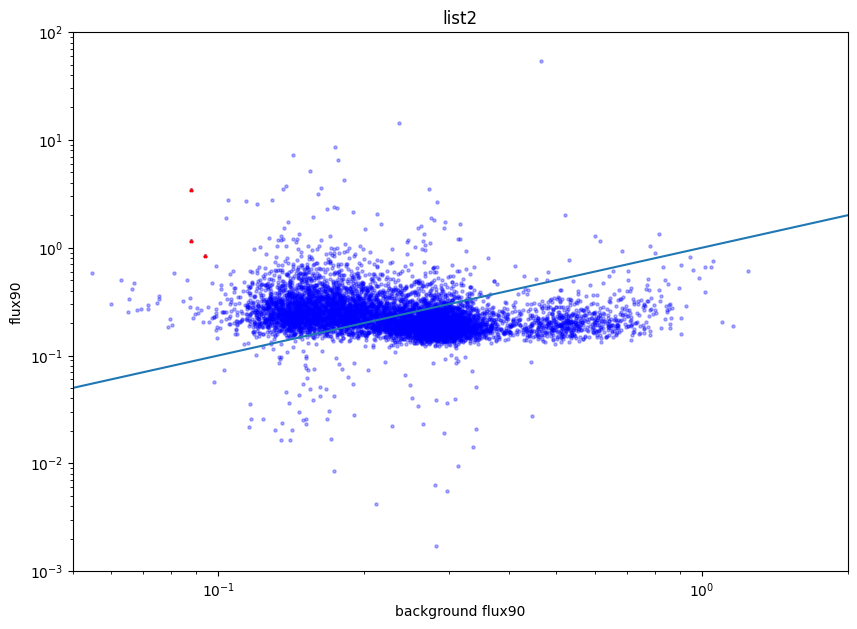

In [27]:
fig, ax = plt.subplots(figsize=(10,7))

x1 = [0.01, 2]
y1 = [0.01, 2]

plt.scatter(
     bg90, flux90,
     color = 'blue',
     s = 5,
     marker = "o",
     alpha = 0.3
)

plt.scatter(
     selected.BG90, selected.FLUX90,
     color = 'red',
     s = 10,
     marker = "2"
)

plt.plot(x1, y1)

plt.xlim([0.05, 2])
plt.ylim([0.001, 100])

plt.title('list2')
plt.xlabel('background flux90')
plt.ylabel('flux90')
plt.yscale('log')
plt.xscale('log')

plt.show()

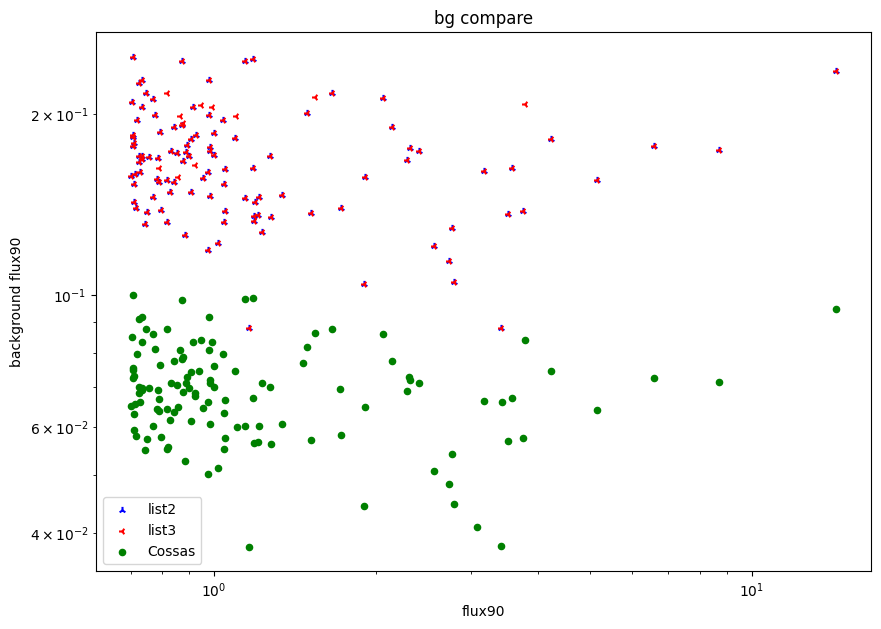

In [12]:
cossas = pd.read_csv('./CentralDogma/3_Gluttony_/cossas_allv2.csv')
list2 = pd.read_csv('./CentralDogma/3_Gluttony_/list2v4xCossas.csv')
list3 = pd.read_csv('./CentralDogma/3_Gluttony_/list3v4xCossas.csv')

fig, ax = plt.subplots(figsize=(10,7))

plt.scatter(
     list2.FLUX90, list2.BG90,
     color = 'blue',
     s = 27,
     marker = "2",
     label = 'list2'
)

plt.scatter(
     list3.FLUX90, list3.BG90,
     color = 'red',
     s = 25,
     marker = "3",
     label = 'list3'
)

plt.scatter(
     cossas.FLUX90, cossas.BG90,
     color = 'green',
     s = 20,
     marker = "o",
     label = 'Cossas'
)

ax.legend()

# plt.xlim([0.05, 2])
# plt.ylim([0.001, 100])

plt.title('bg compare')
plt.ylabel('background flux90')
plt.xlabel('flux90')
plt.yscale('log')
plt.xscale('log')

plt.show()

$$Position$$

In [7]:
alldata = pd.read_csv(
    './CentralDogma/3_Gluttony_/cossas_all_constrains.csv'
    # '/mnt/c/Users/User/Downloads/p9_can/list2_ra_dec.csv'
    # ,compression='gzip'
    # ,sep='  *'
    # ,names=['dd']
    # usecols=
)

mask = (alldata.RA>30) & (alldata.RA<50) & (alldata.DEC>-20) & (alldata.DEC<20)

data = alldata.loc[mask]

In [9]:
data.to_csv('./CentralDogma/3_Gluttony_/cossas_allv2.csv')

In [8]:
len(data.RA)

122

In [12]:
data.to_csv('/mnt/c/Users/User/Downloads/p9_can/list2v2_ra_dec.csv')

In [2]:
dataq = pd.read_csv('/mnt/c/Users/User/Downloads/1sec/list2-2MASSxPS1.csv')

In [25]:
ra = dataq.RA
dec = dataq.DEC

raq = []
for i in range(20301):
    raq.append(ra[i+1]-ra[i])
    if raq[i] <= 0:
        # print(raq[i])
        print(i)

# rax1

83
131
149
191
469
494
574
610
636
678
680
769
1059
1069
1072
1089
1189
1198
1203
1225
1257
1261
1337
1354
1399
1461
1538
1668
1869
1882
1975
2039
2048
2131
2140
2238
2247
2249
2251
2252
2254
2269
2277
2290
2310
2341
2348
2372
2400
2422
2429
2451
2460
2559
2607
2653
2656
2723
2753
2754
2787
2882
2906
2973
3035
3054
3120
3142
3190
3231
3251
3271
3275
3512
3629
3632
3695
3728
3803
3825
3862
4141
4165
4168
4272
4325
4532
4663
4725
4767
4797
4813
4907
4912
4959
5155
5480
5537
5539
5628
5675
5770
5855
5872
5967
5996
6050
6069
6194
6261
6284
6368
6376
6411
6419
6454
6525
6570
6600
6693
6738
6928
6931
7150
7171
7247
7376
7425
7435
7547
7550
7668
7670
7671
7826
7902
7965
7975
8043
8051
8263
8332
8364
8412
8437
8519
8583
8632
8642
8678
8815
8818
8823
9198
9233
9294
9320
9413
9428
9440
9612
9655
9669
9710
9833
9846
9943
9996
10020
10048
10077
10095
10238
10254
10428
10565
10745
10958
10969
10982
11116
11528
11540
11558
11592
11704
11878
11950
12007
12446
12473
12516
12540
12638
12723
12820
12848

In [2]:
Cat1 = fits.open('./CentralDogma/1_Limbo_/FISBSCv2_drateGT0_20220131.fits.gz')  # list 3
Cat2 = fits.open('./CentralDogma/1_Limbo_/FISBSCv2_noMCONF_20220129.fits.gz')   # list 2

# remember to close it?

In [4]:
Cat1[1].header

XTENSION= 'BINTABLE'           /Binary table written by MWRFITS v1.6a           
BITPIX  =                    8 /Required value                                  
NAXIS   =                    2 /Required value                                  
NAXIS1  =                  164 /Number of bytes per row                         
NAXIS2  =              5274338 /Number of rows                                  
PCOUNT  =                    0 /Normally 0 (no varying arrays)                  
GCOUNT  =                    1 /Required value                                  
TFIELDS =                   47 /Number of columns in table                      
COMMENT                                                                         
COMMENT  *** End of mandatory fields ***                                        
COMMENT                                                                         
EXTNAME = 'FIS_BSC '           / Extention Name                                 
COMMENT                     

In [5]:
Cat2[1].header

XTENSION= 'BINTABLE'           /Binary table written by MWRFITS v1.6a           
BITPIX  =                    8 /Required value                                  
NAXIS   =                    2 /Required value                                  
NAXIS1  =                  164 /Number of bytes per row                         
NAXIS2  =               996342 /Number of rows                                  
PCOUNT  =                    0 /Normally 0 (no varying arrays)                  
GCOUNT  =                    1 /Required value                                  
TFIELDS =                   47 /Number of columns in table                      
COMMENT                                                                         
COMMENT  *** End of mandatory fields ***                                        
COMMENT                                                                         
EXTNAME = 'FIS_BSC '           / Extention Name                                 
COMMENT                     

In [10]:
Cat2[1].data[0]

(5000001, '2359599-562456', 0.0005505699213916301, -56.415869929208725, 3.5, 2.3, 321.9114, 2454024.4130555354, 3, 0.03750745, 0.18310973, 0.08256541, nan, 0.20126632, 0.052039884, 0.21616918, nan, 1, 3, 1, 1, 0, 0, 0, 4, 1, 2, 1, 0, 6, 6, 9, 9, 0, 0, 0, 0, 0.032206547, 0.11483217, 0.07948851, 0.22151698, nan, 0.36555663, nan, nan, 90, 1)

In [12]:
Cat2[1].data[0][1]

14